1. 10120724 - Ichsan Nulmuhlis
2. 10120727 - M. Ilham Akbar
3. 10120729 - Rissopan Panji Prayogi
4. 10120749 - Salman Miftahurohman

# 1.Import Library 

 Pustaka ini menyediakan struktur data yang efisien dan mudah digunakan, terutama DataFrame, yang memungkinkan pengolahan data tabular dan deret waktu

In [315]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Variable Checker

Mengecek Jumlah Berapa Jenis Varible pada Kolom

In [316]:
# Membaca data dari file CSV ke dalam DataFrame
df = pd.read_csv('Dataset/HR Employee Attrition(NAIVE BAYES).xlsx - HR Employee Attrition.csv')

# Menampilkan seluruh DataFrame
display(df)

,level,Age,BusinessTravel,Department,Education,Education1,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,MaritalStatus,OverTime,ClassAttrition
0,Senior,41,Travel_Rarely,Sales,D3,2,Life Sciences,2,Female,94,2,Sales Executive,Single,Yes,Yes
1,Senior,49,Travel_Frequently,Research & Development,SMA,1,Life Sciences,3,Male,61,2,Research Scientist,Married,No,No
2,Junior Senior,37,Travel_Rarely,Research & Development,D3,2,Other,4,Male,92,1,Laboratory Technician,Single,Yes,Yes
3,Junior Senior,33,Travel_Frequently,Research & Development,S2,4,Life Sciences,4,Female,56,1,Research Scientist,Married,Yes,No
4,Junior,27,Travel_Rarely,Research & Development,SMA,1,Medical,1,Male,40,1,Laboratory Technician,Married,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Junior Senior,36,Travel_Frequently,Research & Development,D3,2,Medical,3,Male,41,2,Laboratory Technician,Married,No,No
1466,Junior Senior,39,Travel_Rarely,Research & Development,SMA,1,Medical,4,Male,42,3,Healthcare Representative,Married,No,No
1467,Junior,27,Travel_Rarely,Research & Development,S1,3,Life Sciences,2,Male,87,2,Manufacturing Director,Married,Yes,No
1468,Senior,49,Travel_Frequently,Sales,S1,3,Medical,4,Male,63,2,Sales Executive,Married,No,No


In [317]:
# Menampilkan jenis atribut pada setiap kolom
for kolom in df.columns:
    jenis_atribut = df[kolom].unique()
    print(f"Jenis Atribut pada Kolom {kolom}:")
    print(jenis_atribut)
    print()

Jenis Atribut pada Kolom level:
['Senior' 'Junior Senior' 'Junior']

Jenis Atribut pada Kolom Age:
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]

Jenis Atribut pada Kolom BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Jenis Atribut pada Kolom Department:
['Sales' 'Research & Development' 'Human Resources']

Jenis Atribut pada Kolom Education:
['D3' 'SMA' 'S2' 'S1' 'S3']

Jenis Atribut pada Kolom Education1:
[2 1 4 3 5]

Jenis Atribut pada Kolom EducationField:
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Jenis Atribut pada Kolom EnvironmentSatisfaction:
[2 3 4 1]

Jenis Atribut pada Kolom Gender:
['Female' 'Male']

Jenis Atribut pada Kolom HourlyRate:
[ 94  61  92  56  40  79  81  67  44  84  49  31  93  50  51  80  96  78
  45  82  53  83  58  72  48  42  41  86  97  75  33  37  73  98  36  47
  71  30  43  99  59  95  57  76  87  66  55 

# 3. Preposessing Data

Memastikan data yang dipakai sesuai dengan kebutuhan dalam proses algoritma naive bayes

In [318]:
# Membaca data dari file CSV ke dalam DataFrame
df = pd.read_csv('Dataset/HR Employee Attrition(NAIVE BAYES).xlsx - HR Employee Attrition.csv')

# Menghilangkan kolom 'Age' dan 'Education1'
df = df.drop(['Age', 'Education1'], axis=1)

# Mengubah kolom HourlyRate sesuai dengan kondisi yang diberikan
df['HourlyRate'] = df['HourlyRate'].apply(lambda x: 'LOW' if 30 <= x <= 60 else ('HIGH' if 50 <= x <= 80 else 'OTHER'))

# Menyimpan DataFrame baru ke file CSV
df.to_csv('Dataset/data_train.csv', index=False)

In [319]:
# Membaca data dari file CSV ke dalam DataFrame
df = pd.read_csv('Dataset/data_train.csv')

# Menampilkan seluruh DataFrame
display(df)

,level,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,MaritalStatus,OverTime,ClassAttrition
0,Senior,Travel_Rarely,Sales,D3,Life Sciences,2,Female,OTHER,2,Sales Executive,Single,Yes,Yes
1,Senior,Travel_Frequently,Research & Development,SMA,Life Sciences,3,Male,HIGH,2,Research Scientist,Married,No,No
2,Junior Senior,Travel_Rarely,Research & Development,D3,Other,4,Male,OTHER,1,Laboratory Technician,Single,Yes,Yes
3,Junior Senior,Travel_Frequently,Research & Development,S2,Life Sciences,4,Female,LOW,1,Research Scientist,Married,Yes,No
4,Junior,Travel_Rarely,Research & Development,SMA,Medical,1,Male,LOW,1,Laboratory Technician,Married,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Junior Senior,Travel_Frequently,Research & Development,D3,Medical,3,Male,LOW,2,Laboratory Technician,Married,No,No
1466,Junior Senior,Travel_Rarely,Research & Development,SMA,Medical,4,Male,LOW,3,Healthcare Representative,Married,No,No
1467,Junior,Travel_Rarely,Research & Development,S1,Life Sciences,2,Male,OTHER,2,Manufacturing Director,Married,Yes,No
1468,Senior,Travel_Frequently,Sales,S1,Medical,4,Male,HIGH,2,Sales Executive,Married,No,No


In [320]:
# Menampilkan jenis atribut pada setiap kolom
for kolom in df.columns:
    jenis_atribut = df[kolom].unique()
    print(f"Jenis Atribut pada Kolom {kolom}:")
    print(jenis_atribut)
    print()

Jenis Atribut pada Kolom level:
['Senior' 'Junior Senior' 'Junior']

Jenis Atribut pada Kolom BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Jenis Atribut pada Kolom Department:
['Sales' 'Research & Development' 'Human Resources']

Jenis Atribut pada Kolom Education:
['D3' 'SMA' 'S2' 'S1' 'S3']

Jenis Atribut pada Kolom EducationField:
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Jenis Atribut pada Kolom EnvironmentSatisfaction:
[2 3 4 1]

Jenis Atribut pada Kolom Gender:
['Female' 'Male']

Jenis Atribut pada Kolom HourlyRate:
['OTHER' 'HIGH' 'LOW']

Jenis Atribut pada Kolom JobLevel:
[2 1 3 4 5]

Jenis Atribut pada Kolom JobRole:
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

Jenis Atribut pada Kolom MaritalStatus:
['Single' 'Married' 'Divorced']

Jenis Atribut pada Kolom OverTime

# 4. Menentukan Nilai Prior

Perhitungan nilai prior dalam konteks Naive Bayes dilakukan dengan menghitung proporsi atau probabilitas kemunculan setiap kelas dalam dataset. Secara sederhana, nilai prior dari suatu kelas (Class) adalah jumlah frekuensi kemunculan kelas tersebut dibagi dengan total jumlah data. Berikut adalah langkah-langkah umum untuk menghitung nilai prior:

1. Hitung Jumlah Data: Hitung total jumlah data dalam dataset.
2. Hitung Jumlah Kemunculan Setiap Kelas: Hitung jumlah kemunculan setiap kelas (ClassAttrition) dalam dataset.
3. Hitung Nilai Prior untuk Setiap Kelas: Hitung nilai prior untuk setiap kelas dengan membagi jumlah kemunculan kelas tersebut dengan total jumlah data.


In [321]:
# Hitung total jumlah data
total_data = len(df)

# Hitung jumlah kemunculan setiap kelas
jumlah_kelas_0 = df['ClassAttrition'].value_counts()['No']
jumlah_kelas_1 = df['ClassAttrition'].value_counts()['Yes']

# Hitung nilai prior untuk setiap kelas
prior_kelas_0 = jumlah_kelas_0 / total_data
prior_kelas_1 = jumlah_kelas_1 / total_data

# Menampilkan hasil perhitungan
print("N(T):", total_data)
print("N(A1) 'No':", jumlah_kelas_0)
print("N(A2) 'Yes':", jumlah_kelas_1)
print("P(A1) 'No':", prior_kelas_0)
print("P(A2) 'Yes':", prior_kelas_1)


N(T): 1470
N(A1) 'No': 1233
N(A2) 'Yes': 237
P(A1) 'No': 0.8387755102040816
P(A2) 'Yes': 0.16122448979591836


# 5. Tabel Kontigensi

Tabel kontingensi atau confusion matrix digunakan untuk mengevaluasi kinerja model klasifikasi dengan membandingkan hasil prediksi model dengan nilai aktual atau ground truth. Dalam konteks Naive Bayes, kita dapat membuat tabel kontingensi dengan menghitung berapa banyak prediksi model yang benar dan berapa banyak yang salah untuk setiap kelas.


In [322]:
# Membaca data dari file CSV ke dalam DataFrame
df = pd.read_csv('Dataset/data_train.csv')

# Menggunakan ClassAttrition sebagai variabel aktual
variabel_prediksi = 'ClassAttrition'

# Menentukan nilai yang mungkin untuk ClassAttrition
nilai_class_attrition = df[variabel_prediksi].unique()

# Iterasi melalui setiap kolom (variabel) dan menghitung tabel kontingensi
for kolom in df.columns:
    if kolom != variabel_prediksi:
        print(f"\nTabel Kontingensi untuk {kolom} terhadap {variabel_prediksi}:")
        for nilai_prediksi in nilai_class_attrition:
            tabel_kontingensi = pd.crosstab(index=df[kolom], columns=df[variabel_prediksi] == nilai_prediksi, margins=True, margins_name='Total')
            print(f"\n{nilai_prediksi}:\n{tabel_kontingensi}")



Tabel Kontingensi untuk level terhadap ClassAttrition:

Yes:
ClassAttrition  False  True  Total
level                             
Junior            235    91    326
Junior Senior     533    89    622
Senior            465    57    522
Total            1233   237   1470

No:
ClassAttrition  False  True  Total
level                             
Junior             91   235    326
Junior Senior      89   533    622
Senior             57   465    522
Total             237  1233   1470

Tabel Kontingensi untuk BusinessTravel terhadap ClassAttrition:

Yes:
ClassAttrition     False  True  Total
BusinessTravel                       
Non-Travel           138    12    150
Travel_Frequently    208    69    277
Travel_Rarely        887   156   1043
Total               1233   237   1470

No:
ClassAttrition     False  True  Total
BusinessTravel                       
Non-Travel            12   138    150
Travel_Frequently     69   208    277
Travel_Rarely        156   887   1043
Total              


Yes:
ClassAttrition          False  True  Total
Department                                
Human Resources            51    12     63
Research & Development    828   133    961
Sales                     354    92    446
Total                    1233   237   1470

No:
ClassAttrition          False  True  Total
Department                                
Human Resources            12    51     63
Research & Development    133   828    961
Sales                      92   354    446
Total                     237  1233   1470

Tabel Kontingensi untuk Education terhadap ClassAttrition:

Yes:
ClassAttrition  False  True  Total
Education                         
D3                238    44    282
S1                473    99    572
S2                340    58    398
S3                 43     5     48
SMA               139    31    170
Total            1233   237   1470

No:
ClassAttrition  False  True  Total
Education                         
D3                 44   238    282
S1               

Hasil Pelatihan

In [323]:
# Iterasi melalui setiap kolom (variabel) dan menghitung tabel kontingensi
for kolom in df.columns:
    if kolom != variabel_prediksi:
        print(f"\nTabel Kontingensi untuk {kolom} terhadap {variabel_prediksi}:")
        for nilai_prediksi in nilai_class_attrition:
            tabel_kontingensi = pd.crosstab(index=df[kolom], columns=df[variabel_prediksi] == nilai_prediksi, margins=True, margins_name='Total')
            
            # Membagi hasil dengan N(A1) untuk 'No' dan N(A2) untuk 'Yes'
            if nilai_prediksi == 'Yes':
                print(f"\n{nilai_prediksi}:\n{tabel_kontingensi/jumlah_kelas_1}")
            elif nilai_prediksi == 'No':
                print(f"\n{nilai_prediksi}:\n{tabel_kontingensi/jumlah_kelas_0}")


Tabel Kontingensi untuk level terhadap ClassAttrition:

Yes:
ClassAttrition     False      True     Total
level                                       
Junior          0.991561  0.383966  1.375527
Junior Senior   2.248945  0.375527  2.624473
Senior          1.962025  0.240506  2.202532
Total           5.202532  1.000000  6.202532

No:
ClassAttrition     False      True     Total
level                                       
Junior          0.073804  0.190592  0.264396
Junior Senior   0.072182  0.432279  0.504461
Senior          0.046229  0.377129  0.423358
Total           0.192214  1.000000  1.192214

Tabel Kontingensi untuk BusinessTravel terhadap ClassAttrition:

Yes:
ClassAttrition        False      True     Total
BusinessTravel                                 
Non-Travel         0.582278  0.050633  0.632911
Travel_Frequently  0.877637  0.291139  1.168776
Travel_Rarely      3.742616  0.658228  4.400844
Total              5.202532  1.000000  6.202532

No:
ClassAttrition        False  

# 6. Probabilitas Likelihood

Menghitung Iterasi Probabilitas Likelihood adalah langkah kedua dalam algoritma Naive Bayes. Probabilitas Likelihood menggambarkan seberapa sering suatu nilai fitur muncul dalam setiap kelas yang berbeda.

In [324]:
# Iterasi melalui setiap kolom (variabel) dan menghitung Probabilitas Likelihood
for kolom in df.columns:
    if kolom != variabel_prediksi:
        print(f"\nProbabilitas Likelihood untuk {kolom} terhadap {variabel_prediksi}:")

        # Hitung Probabilitas Likelihood untuk setiap nilai prediksi
        for nilai_prediksi in nilai_class_attrition:
            # Filter dataframe berdasarkan nilai prediksi
            subset_df = df[df[variabel_prediksi] == nilai_prediksi]

            # Hitung Probabilitas Likelihood untuk setiap nilai fitur dalam kelas tertentu
            for nilai_fitur in df[kolom].unique():
                try:
                    prob_likelihood = subset_df[kolom].value_counts()[nilai_fitur] / len(subset_df)
                    print(f"\n{nilai_prediksi} - {nilai_fitur}:\nProbabilitas Likelihood: {prob_likelihood}")
                except KeyError:
                    print(f"\n{nilai_prediksi} - {nilai_fitur}:\nProbabilitas Likelihood: 0 (Data tidak tersedia)")




Probabilitas Likelihood untuk level terhadap ClassAttrition:

Yes - Senior:
Probabilitas Likelihood: 0.24050632911392406

Yes - Junior Senior:
Probabilitas Likelihood: 0.3755274261603376

Yes - Junior:
Probabilitas Likelihood: 0.38396624472573837

No - Senior:
Probabilitas Likelihood: 0.3771289537712895

No - Junior Senior:
Probabilitas Likelihood: 0.43227899432278993

No - Junior:
Probabilitas Likelihood: 0.19059205190592052

Probabilitas Likelihood untuk BusinessTravel terhadap ClassAttrition:

Yes - Travel_Rarely:
Probabilitas Likelihood: 0.6582278481012658

Yes - Travel_Frequently:
Probabilitas Likelihood: 0.2911392405063291

Yes - Non-Travel:
Probabilitas Likelihood: 0.05063291139240506

No - Travel_Rarely:
Probabilitas Likelihood: 0.7193836171938361

No - Travel_Frequently:
Probabilitas Likelihood: 0.16869424168694241

No - Non-Travel:
Probabilitas Likelihood: 0.11192214111922141

Probabilitas Likelihood untuk Department terhadap ClassAttrition:

Yes - Sales:
Probabilitas Likeli

# 7. Prediksi Kelas:

Pilih kelas dengan probabilitas posterior tertinggi sebagai prediksi untuk setiap instance dalam set pengujian.


In [325]:
def prediksi_kelas(data):
    probabilitas_posterior = {}

    # Iterasi melalui nilai kelas yang mungkin
    for nilai_kelas in nilai_class_attrition:
        probabilitas_posterior[nilai_kelas] = 1.0

        # Iterasi melalui setiap kolom (variabel)
        for kolom in df.columns:
            if kolom != variabel_prediksi:
                # Hitung Probabilitas Likelihood langsung dari DataFrame
                count_values = df.groupby([kolom, variabel_prediksi]).size().reset_index(name='count')
                total_kelas = df[variabel_prediksi].value_counts()[nilai_kelas]

                # Handling kasus jika nilai_fitur tidak ada di count_values
                nilai_fitur = data[kolom]
                prob_likelihood = (count_values[(count_values[kolom] == nilai_fitur) & (count_values[variabel_prediksi] == nilai_kelas)]['count'].values + 1) / (total_kelas + len(df[kolom].unique()))

                # Mengambil nilai Probabilitas Likelihood dari hasil sebelumnya
                if len(prob_likelihood) == 0:
                    probabilitas_posterior[nilai_kelas] = 0.0
                    break

                # Kalikan dengan Probabilitas Posterior
                probabilitas_posterior[nilai_kelas] *= prob_likelihood[0]

    # Pilih kelas dengan probabilitas tertinggi
    kelas_terpilih = max(probabilitas_posterior, key=probabilitas_posterior.get)
    return kelas_terpilih


# 8. Pengujian

Pengujian model Naive Bayes dilakukan dengan menguji seberapa baik model tersebut dapat memprediksi kelas target

In [326]:
data_prediksi = {
    'level': 'Senior',
    'BusinessTravel': 'Travel_Frequently',
    'Department': 'Research & Development',
    'Education': 'SMA',
    'EducationField': 'Life Sciences',
    'EnvironmentSatisfaction': 3,
    'Gender': 'MALE',
    'HourlyRate': 'HIGH',
    'JobLevel': 3,
    'JobRole': 'Research Scientist',
    'MaritalStatus': 'Married',
    'OverTime': 'No'
}

hasil_prediksi = prediksi_kelas(data_prediksi)
print(f"Hasil prediksi kelas: {hasil_prediksi}")


Hasil prediksi kelas: Yes


Hasil Pengujian

In [332]:
# Membaca data uji dari file CSV
data_uji = pd.read_csv('Dataset/data_test.csv')

# Menambahkan kolom 'Hasil_Prediksi' ke DataFrame
data_uji['Hasil_Prediksi'] = data_uji.apply(prediksi_kelas, axis=1)

# Evaluasi model
akurasi = sum(data_uji['ClassAttrition'] == data_uji['Hasil_Prediksi']) / len(data_uji)

print(f"Akurasi: {akurasi}")


Akurasi: 0.7023411371237458


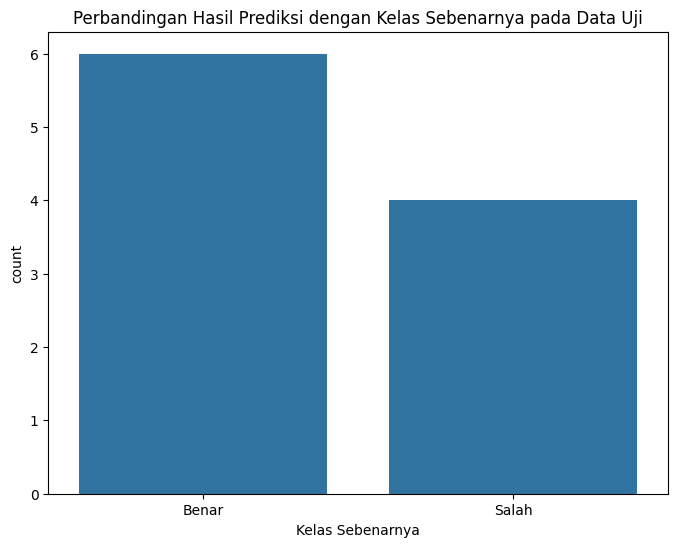

In [331]:
# Menghitung jumlah prediksi yang benar dan salah
correct_predictions = data_uji[data_uji['ClassAttrition'] == data_uji['Hasil_Prediksi']]
incorrect_predictions = data_uji[data_uji['ClassAttrition'] != data_uji['Hasil_Prediksi']]

# Menyiapkan data untuk visualisasi
data_visualization = pd.DataFrame({
    'Kelas Sebenarnya': ['Benar'] * len(correct_predictions) + ['Salah'] * len(incorrect_predictions)
})

# Membuat diagram batang
plt.figure(figsize=(8, 6))
sns.countplot(x='Kelas Sebenarnya', data=data_visualization)
plt.title('Perbandingan Hasil Prediksi dengan Kelas Sebenarnya pada Data Uji')
plt.show()


In [330]:
# Membaca data uji dari file CSV
data_uji = pd.read_csv('data_input.csv')

# Menambahkan kolom 'Hasil_Prediksi' ke DataFrame
data_uji['Hasil_Prediksi'] = data_uji.apply(prediksi_kelas, axis=1)

# Menampilkan hasil prediksi kelas 'ClassAttrition'
hasil_prediksi_kelas = data_uji[['ClassAttrition', 'Hasil_Prediksi']]
print("\nHasil Prediksi Kelas:")
print(hasil_prediksi_kelas)



Hasil Prediksi Kelas:
  ClassAttrition Hasil_Prediksi
0            Yes            Yes
1             No             No
2            Yes            Yes
3             No            Yes
4             No            Yes
5             No            Yes
6             No            Yes
7             No             No
8             No             No
9             No             No
